# Adam Trentowski - 162602 - Machine Learning
## lab_12
## Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import warnings
import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output

from sklearn.model_selection import train_test_split

## Data loading

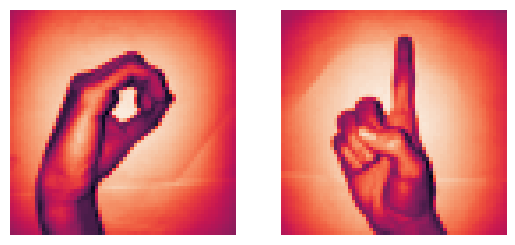

In [2]:
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')

img_size = 64

plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

plt.show()

## Join arrays row-wise; 0–204: zero, 205–410: one.

In [3]:
X = np.concatenate((x_l[204:409], x_l[822:1027]), axis=0)

z = np.zeros(205)
o = np.ones(205)

Y = np.concatenate((z, o), axis=0).reshape(X.shape[0], 1)

print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


## Splitting dataset to train and test sets

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1] * X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1] * X_test.shape[2])

print("X train flatten", X_train_flatten.shape)
print("X test flatten", X_test_flatten.shape)

x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)
x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


## Initializing parameters and layer sizes

In [6]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {
        "weight1": np.random.randn(3, x_train.shape[0]) * 0.1,
        "bias1": np.zeros((3, 1)),
        "weight2": np.random.randn(y_train.shape[0], 3) * 0.1,
        "bias2": np.zeros((y_train.shape[0], 1))
    }
    return parameters

## Forward propagation steps

In [7]:
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"], x_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"], A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }

    return A2, cache

## Sigmoid function

In [8]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

## Cost function

In [15]:
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2), Y)
    cost = -np.sum(logprobs) / Y.shape[1]
    return cost

## Back propagation

In [16]:
def backward_propagation_NN(parameters, cache, X, Y):
    dZ2 = cache["A2"] - Y
    dW2 = np.dot(dZ2, cache["A1"].T) / X.shape[1]
    db2 = np.sum(dZ2, axis=1, keepdims=True) / X.shape[1]

    dZ1 = np.dot(parameters["weight2"].T, dZ2) * (1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1, X.T) / X.shape[1]
    db1 = np.sum(dZ1, axis=1, keepdims=True) / X.shape[1]

    grads = {
        "dweight1": dW1,
        "dbias1": db1,
        "dweight2": dW2,
        "dbias2": db2
    }

    return grads

## Updating (learning) parameters

In [17]:
def update_parameters_NN(parameters, grads, learning_rate=0.01):
    parameters = {
        "weight1": parameters["weight1"] - learning_rate * grads["dweight1"],
        "bias1": parameters["bias1"] - learning_rate * grads["dbias1"],
        "weight2": parameters["weight2"] - learning_rate * grads["dweight2"],
        "bias2": parameters["bias2"] - learning_rate * grads["dbias2"]
    }
    return parameters

## Prediction function

In [18]:
def predict_NN(parameters, x_test):
    # x_test is an input for forward propagation
    A2, cache = forward_propagation_NN(x_test, parameters)
    Y_prediction = np.zeros((1, x_test.shape[1]))

    # if z is bigger than 0.5, our prediction is sign one (y_head = 1)
    # if z is smaller than 0.5, our prediction is sign zero (y_head = 0)
    for i in range(A2.shape[1]):
        if A2[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1

    return Y_prediction

## Creating model - 2 - layer neural network

In [19]:
def two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations):
    cost_list = []
    index_list = []

    # initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
        # forward propagation
        A2, cache = forward_propagation_NN(x_train, parameters)

        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)

        # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)

        # update parameters
        parameters = update_parameters_NN(parameters, grads)

        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print("Cost after iteration %i: %f" % (i, cost))

    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    # predict
    y_prediction_test = predict_NN(parameters, x_test)
    y_prediction_train = predict_NN(parameters, x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

    return parameters

Cost after iteration 0: 0.686181
Cost after iteration 100: 0.653347
Cost after iteration 200: 0.586836
Cost after iteration 300: 0.501498
Cost after iteration 400: 0.422180
Cost after iteration 500: 0.356619
Cost after iteration 600: 0.304536
Cost after iteration 700: 0.267065
Cost after iteration 800: 0.234341
Cost after iteration 900: 0.208148
Cost after iteration 1000: 0.186929
Cost after iteration 1100: 0.169530
Cost after iteration 1200: 0.155017
Cost after iteration 1300: 0.142734
Cost after iteration 1400: 0.132313
Cost after iteration 1500: 0.123478
Cost after iteration 1600: 0.115927
Cost after iteration 1700: 0.109367
Cost after iteration 1800: 0.103516
Cost after iteration 1900: 0.098069
Cost after iteration 2000: 0.092713
Cost after iteration 2100: 0.087564
Cost after iteration 2200: 0.083109
Cost after iteration 2300: 0.079333
Cost after iteration 2400: 0.076022


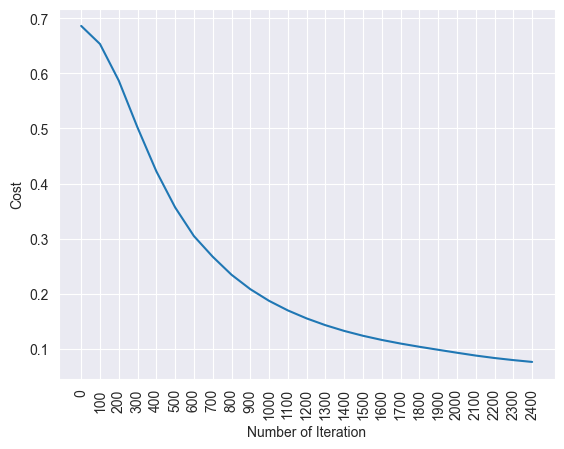

train accuracy: 99.42528735632185 %
test accuracy: 96.7741935483871 %


In [20]:
parameters = two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations=2500)